In [17]:
import matplotlib
import warnings
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
import visualize
import preprocessing

In [47]:
pattern = "./Past/input/*.csv"
past_df = preprocessing.load_all_csv(pattern)
print("{} rows {} columns".format(*past_df.shape))

['./Past/input/INvideos.csv', './Past/input/RUvideos.csv', './Past/input/USvideos.csv']
119040 rows 16 columns


In [48]:
pattern = "./Current/input/*.csv"
curr_df = preprocessing.load_all_csv(pattern)
print("{} rows {} columns".format(*curr_df.shape))

['./Current/input/INvideos.csv', './Current/input/RUvideos.csv', './Current/input/USvideos.csv']
2759 rows 18 columns


## Processing

In [49]:
preprocessing.fill_category(past_df)
preprocessing.cleanup_df(past_df)

preprocessing.fill_category(curr_df)
preprocessing.cleanup_df(curr_df)

## 1. Correlation

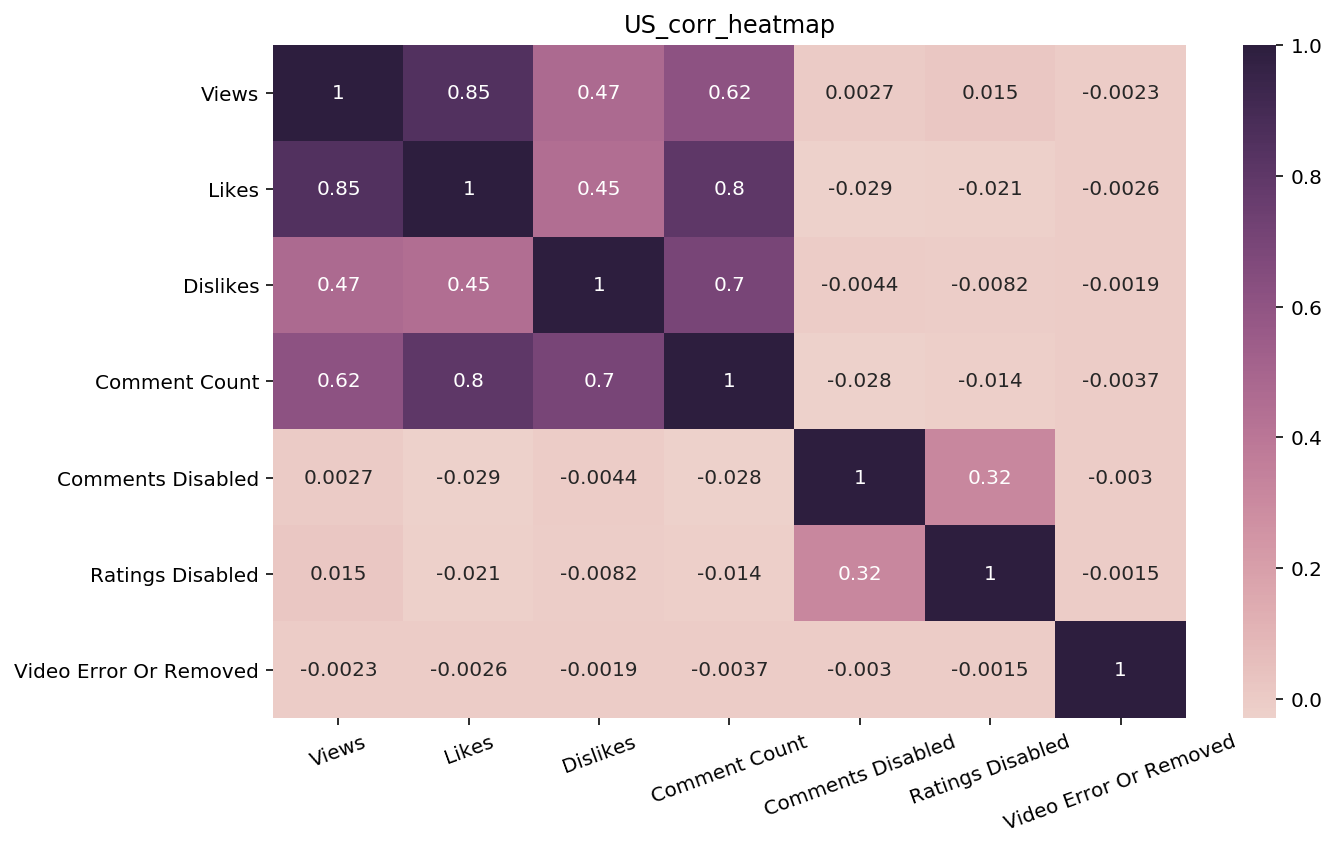

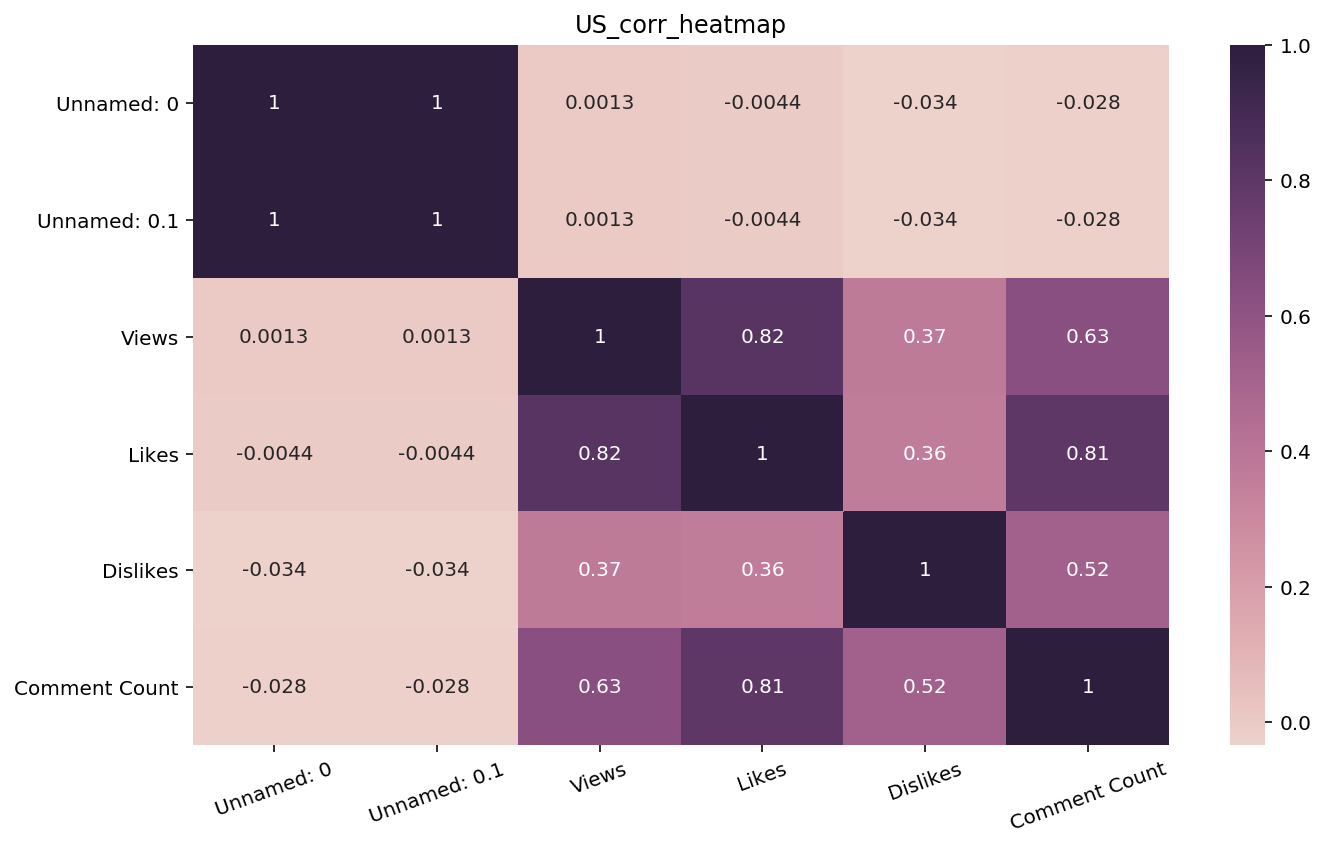

In [50]:
brief = ['category_id','views', 'likes', 'dislikes', 'comment_count']

visualize.plot_correlation(past_df, "US", xrot=20)
visualize.plot_correlation(curr_df, "US", xrot=20)

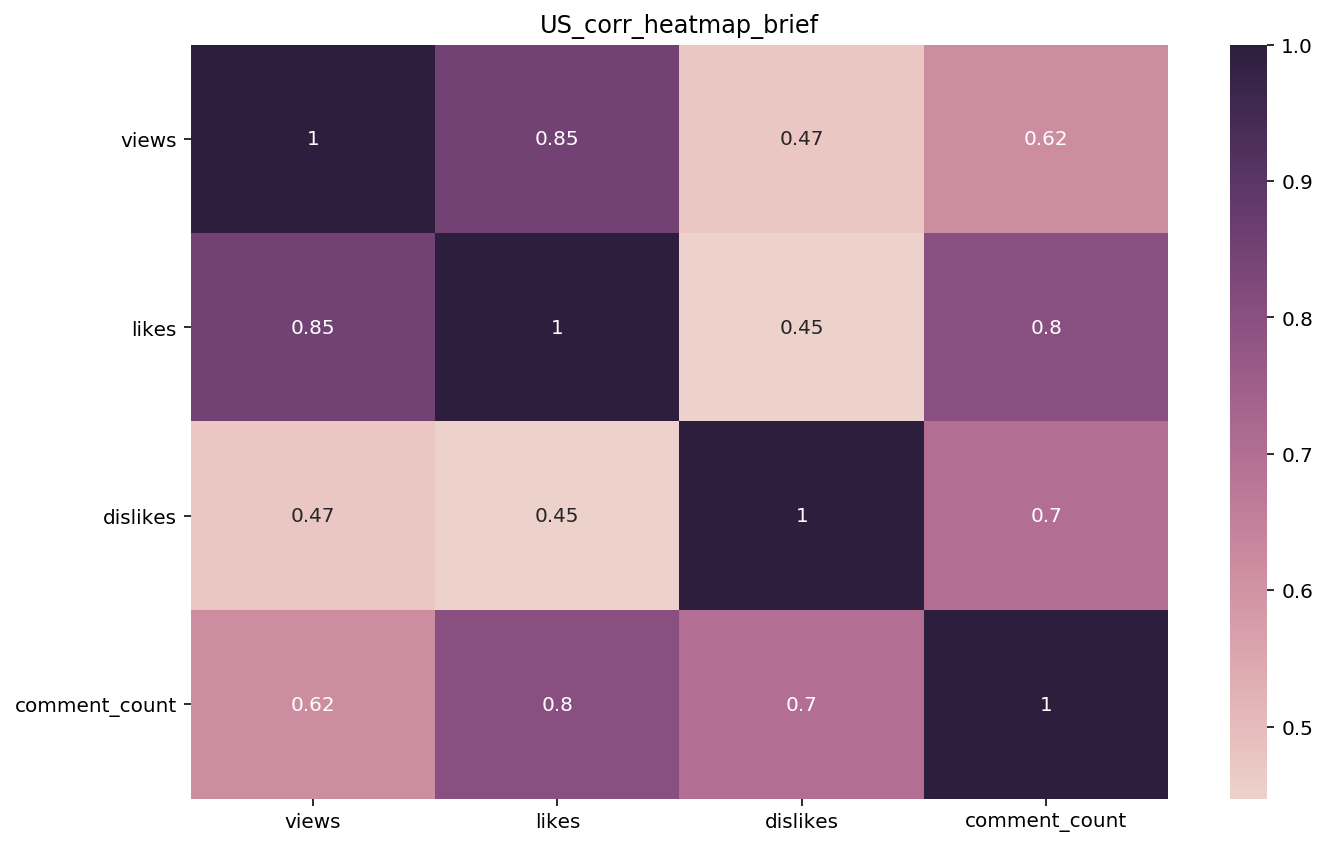

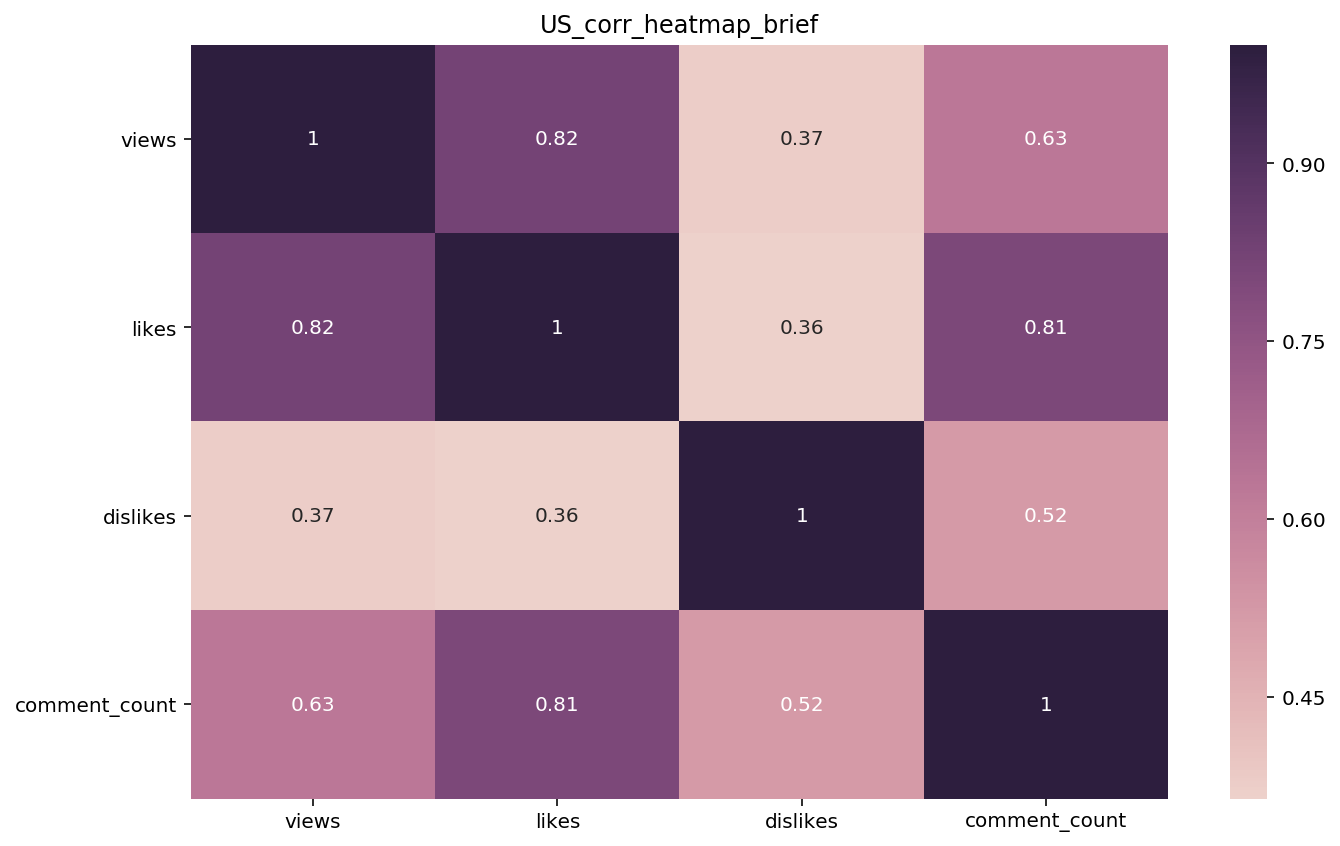

In [51]:
visualize.plot_correlation(past_df, "US", brief=brief)
visualize.plot_correlation(curr_df, "US", brief=brief)

## 2. Days on trending list

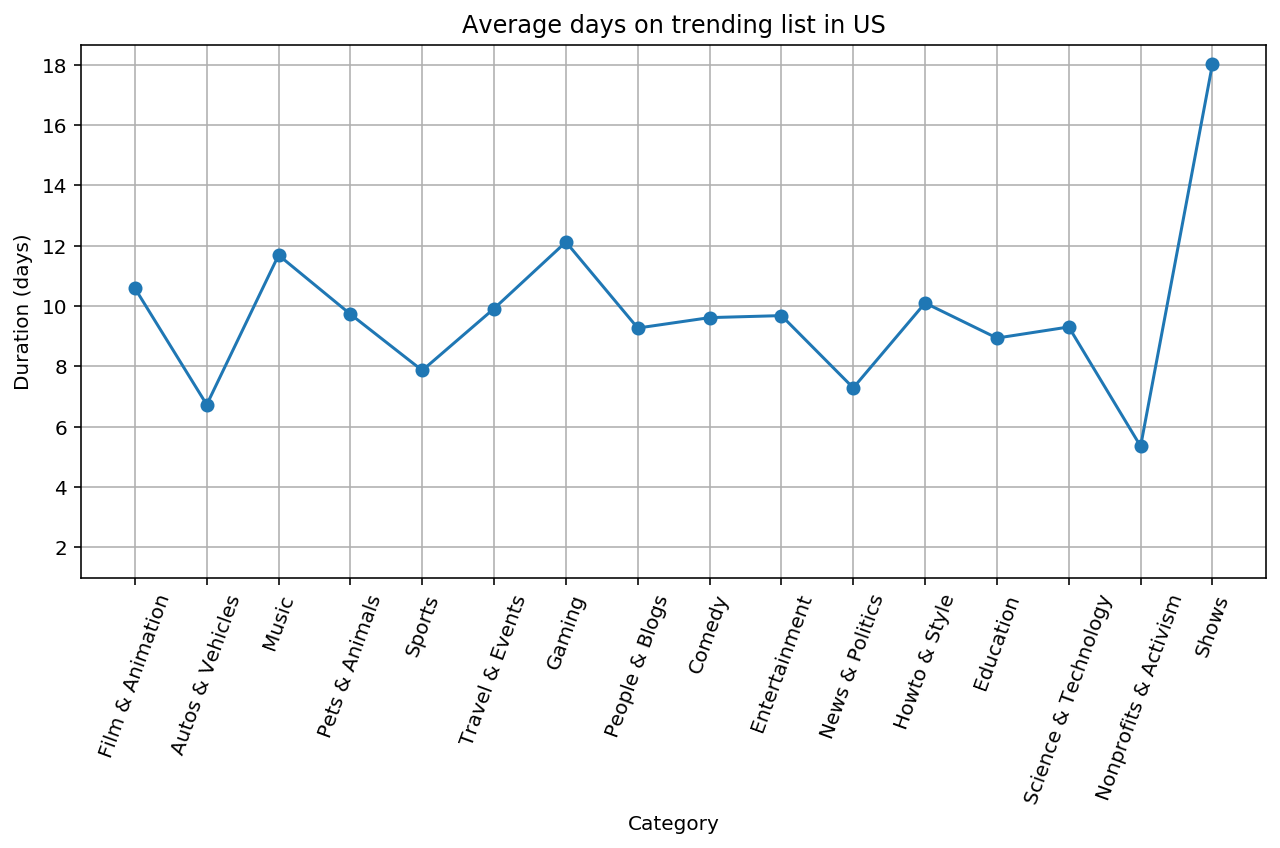

ValueError: invalid literal for int() with base 10: '23.0'

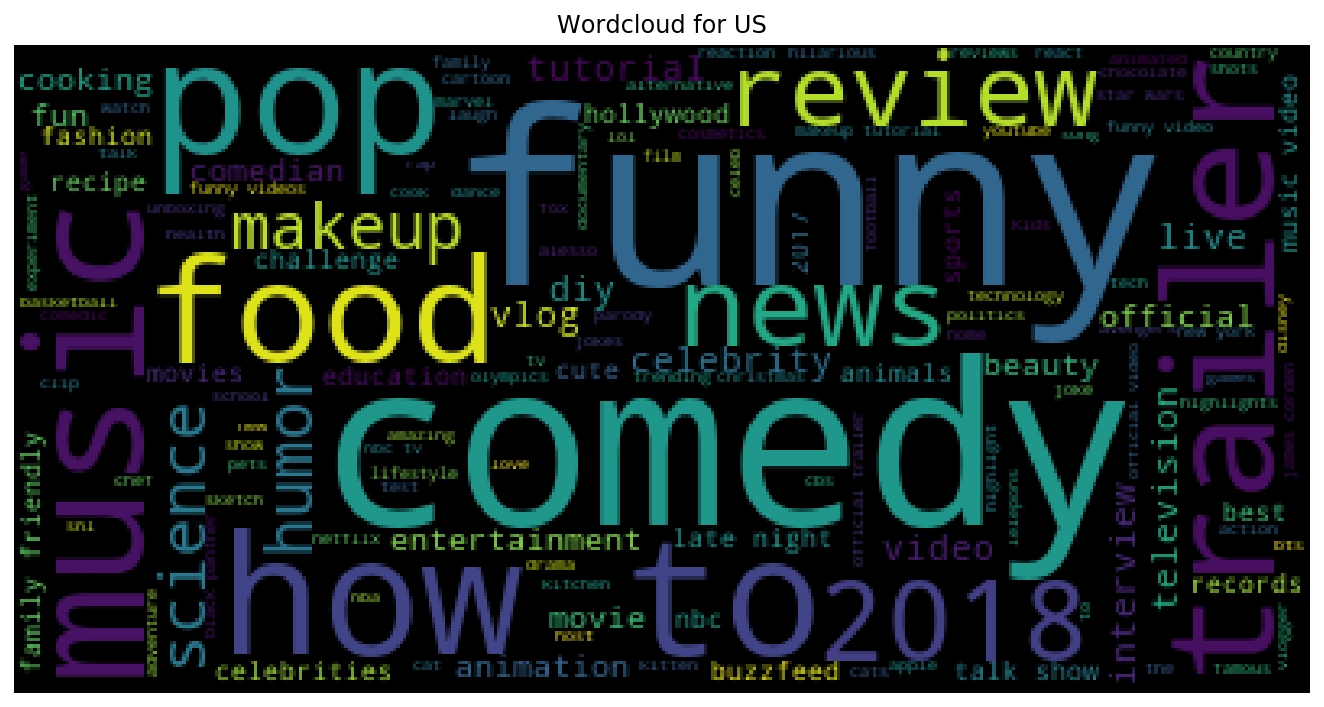

In [53]:
visualize.plot_duration_on_list(past_df,
                                country="US",
                                file="./Past/input/US_category_id.json",
                                xrot=70)

visualize.plot_duration_on_list(curr_df,
                                country="US",
                                file="./Current/input/US_category_id.json",
                                xrot=70)

## 3. Publish time

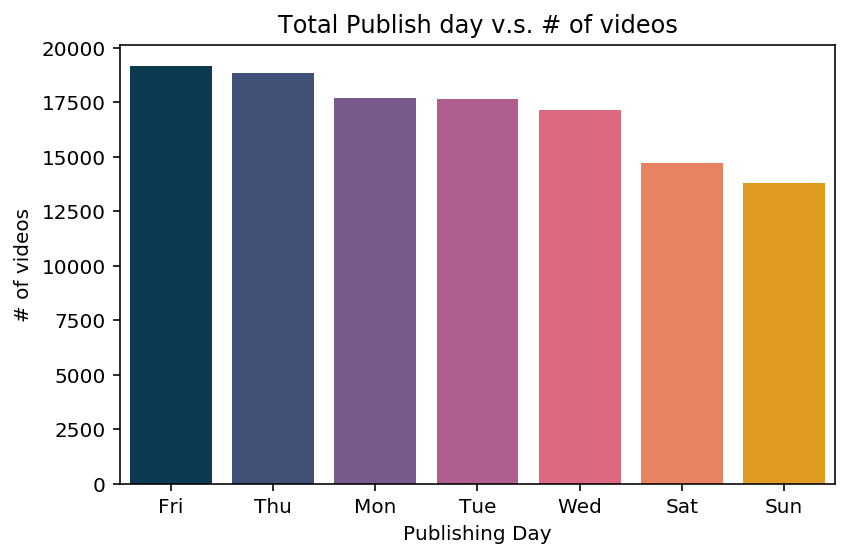

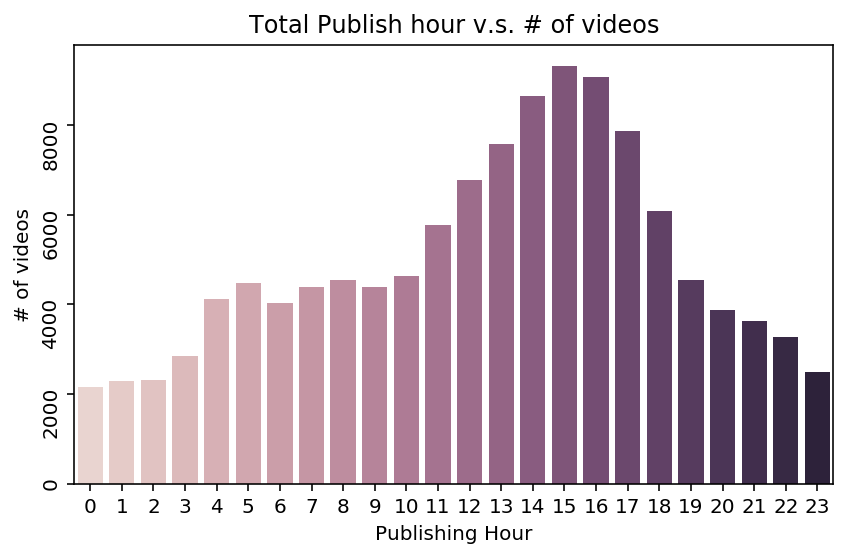

In [6]:
visualize.plot_publish_info(past_df)
visualize.plot_publish_info(past_df)

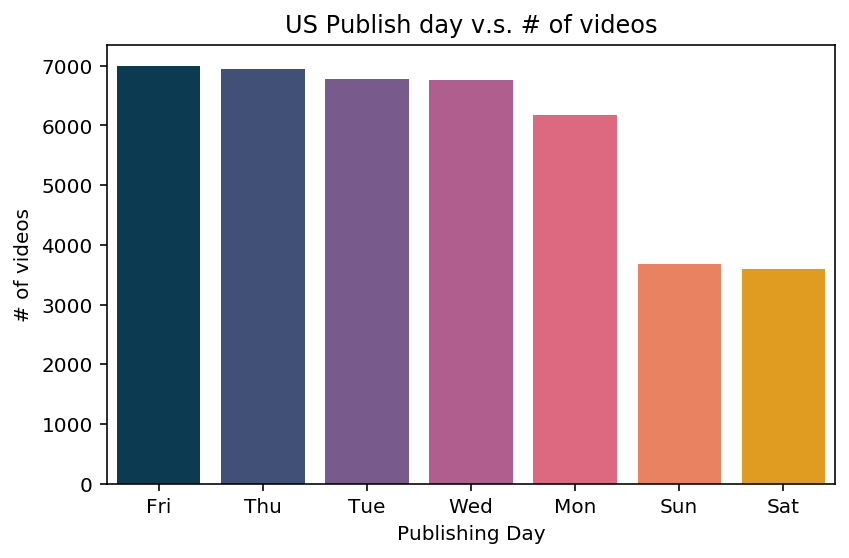

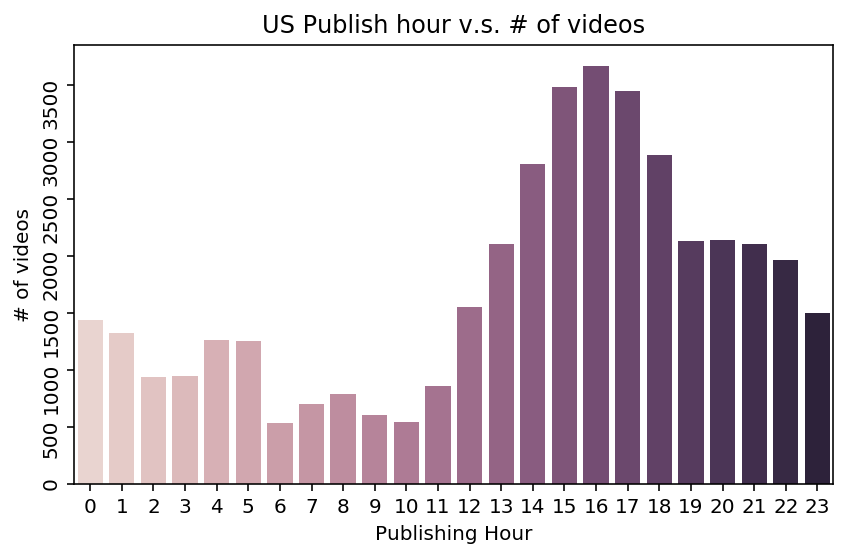

In [7]:
visualize.plot_publish_info(past_df, country="US")

## 4. Category Ranking

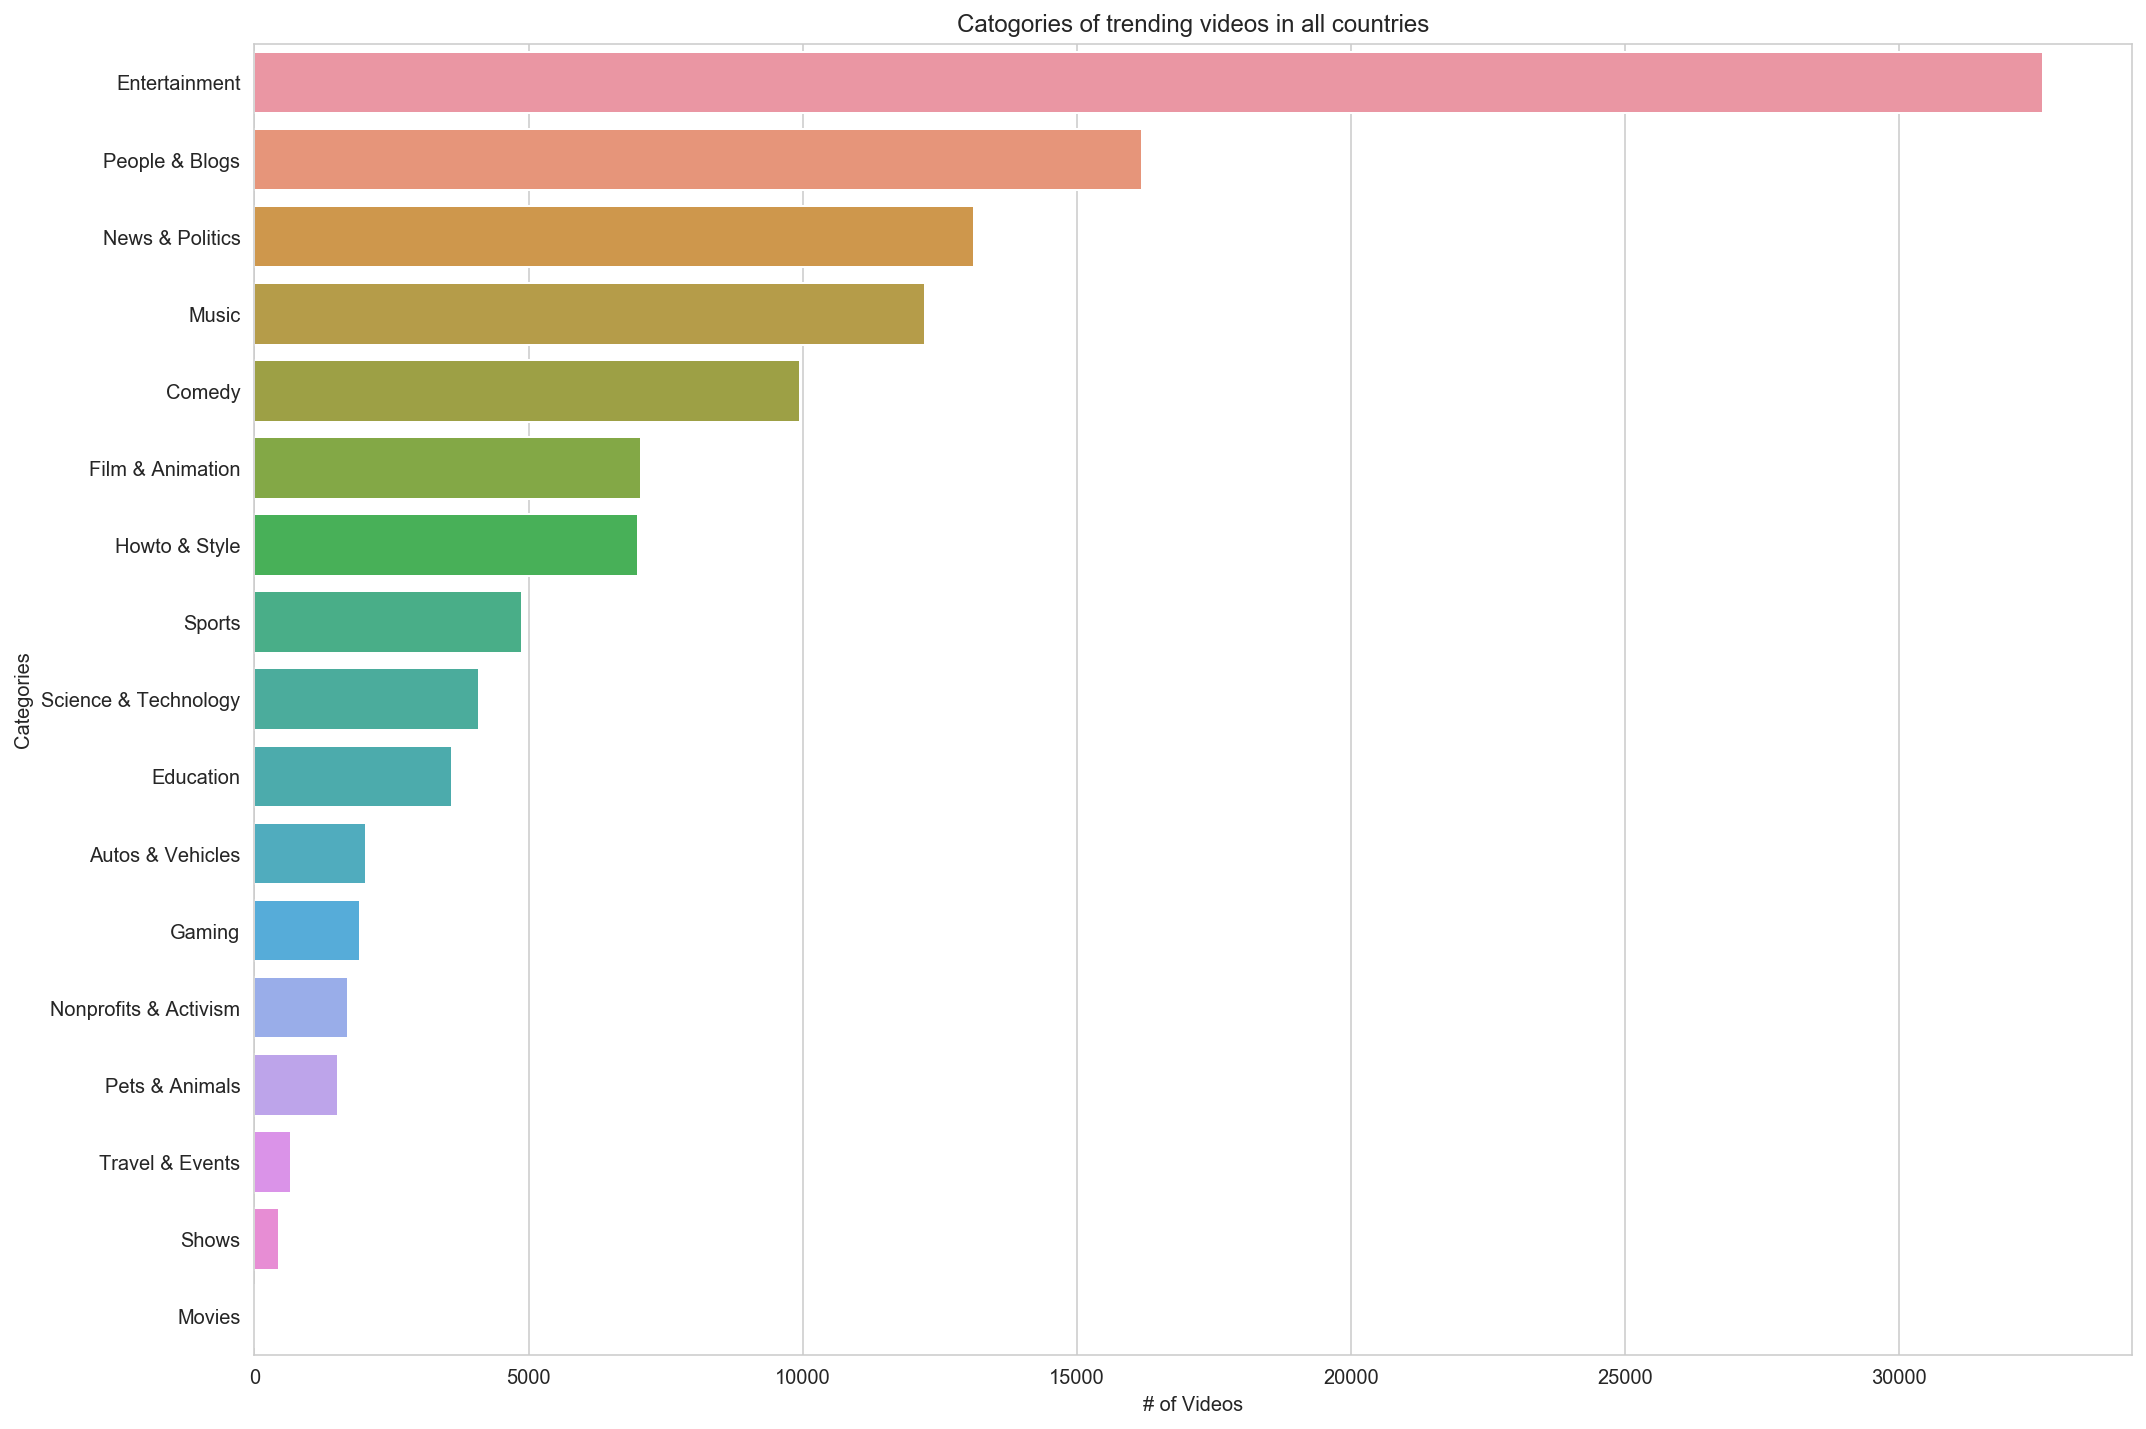

In [6]:
visualize.plot_ranking(past_df)

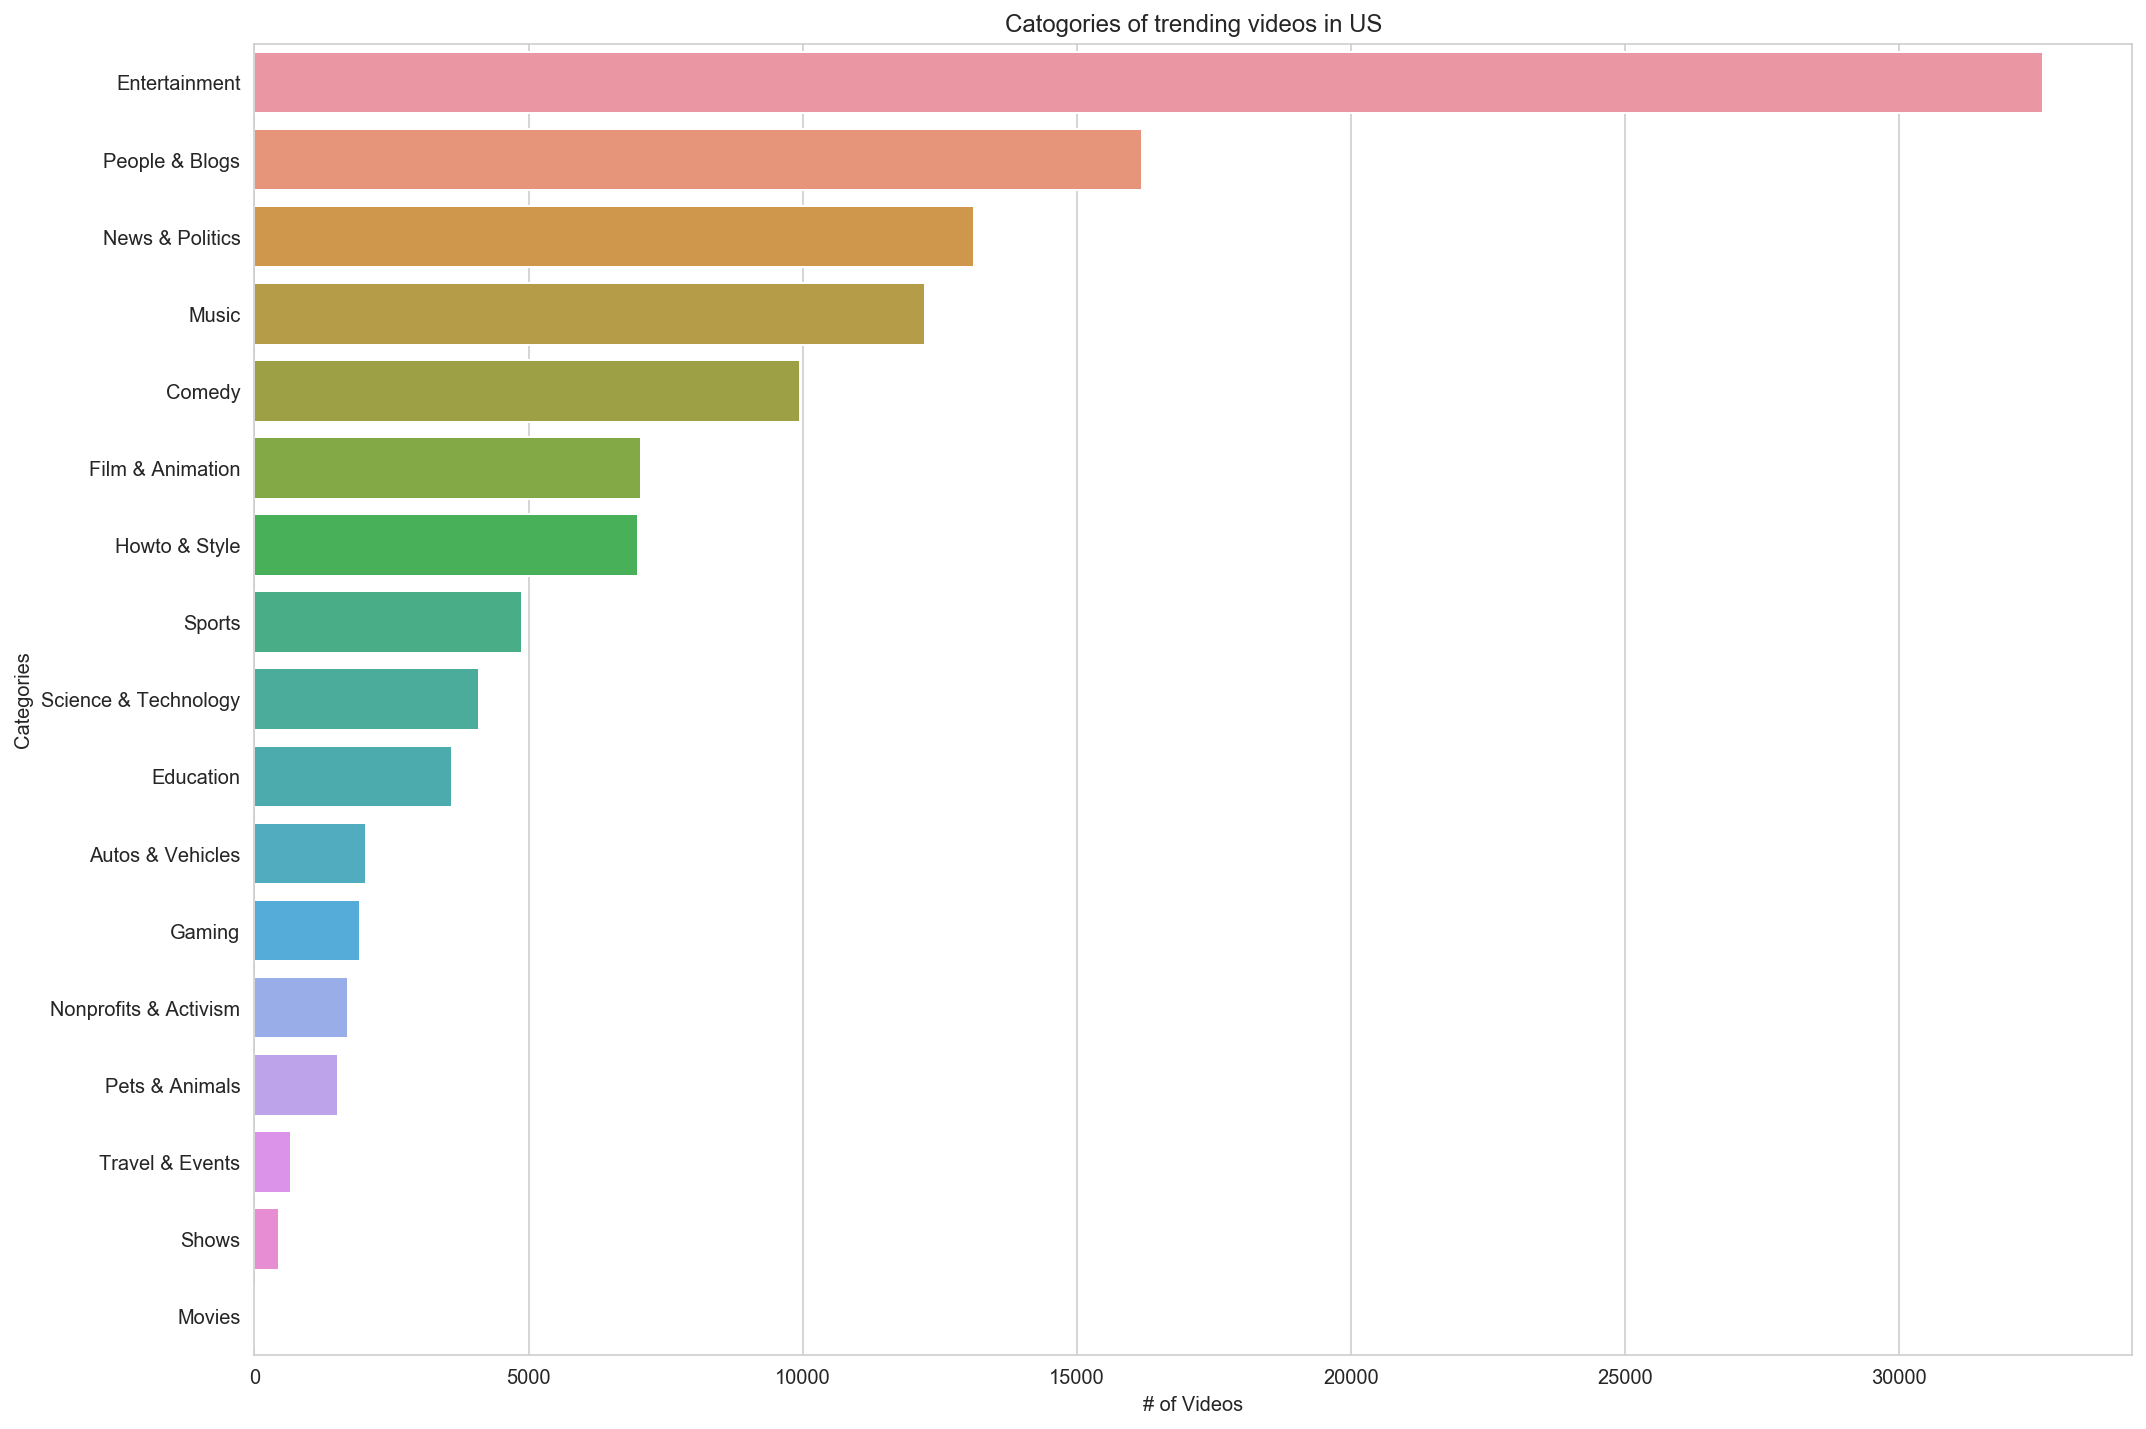

In [8]:
visualize.plot_ranking(past_df, country="US")

## 5. like/dislike/comment_count/views ratios

In [8]:
combinations = [
    ("likes", "dislikes"),
    ("views", "comment_count"),
    ("dislikes", "views"),
    ("likes", "views")
]

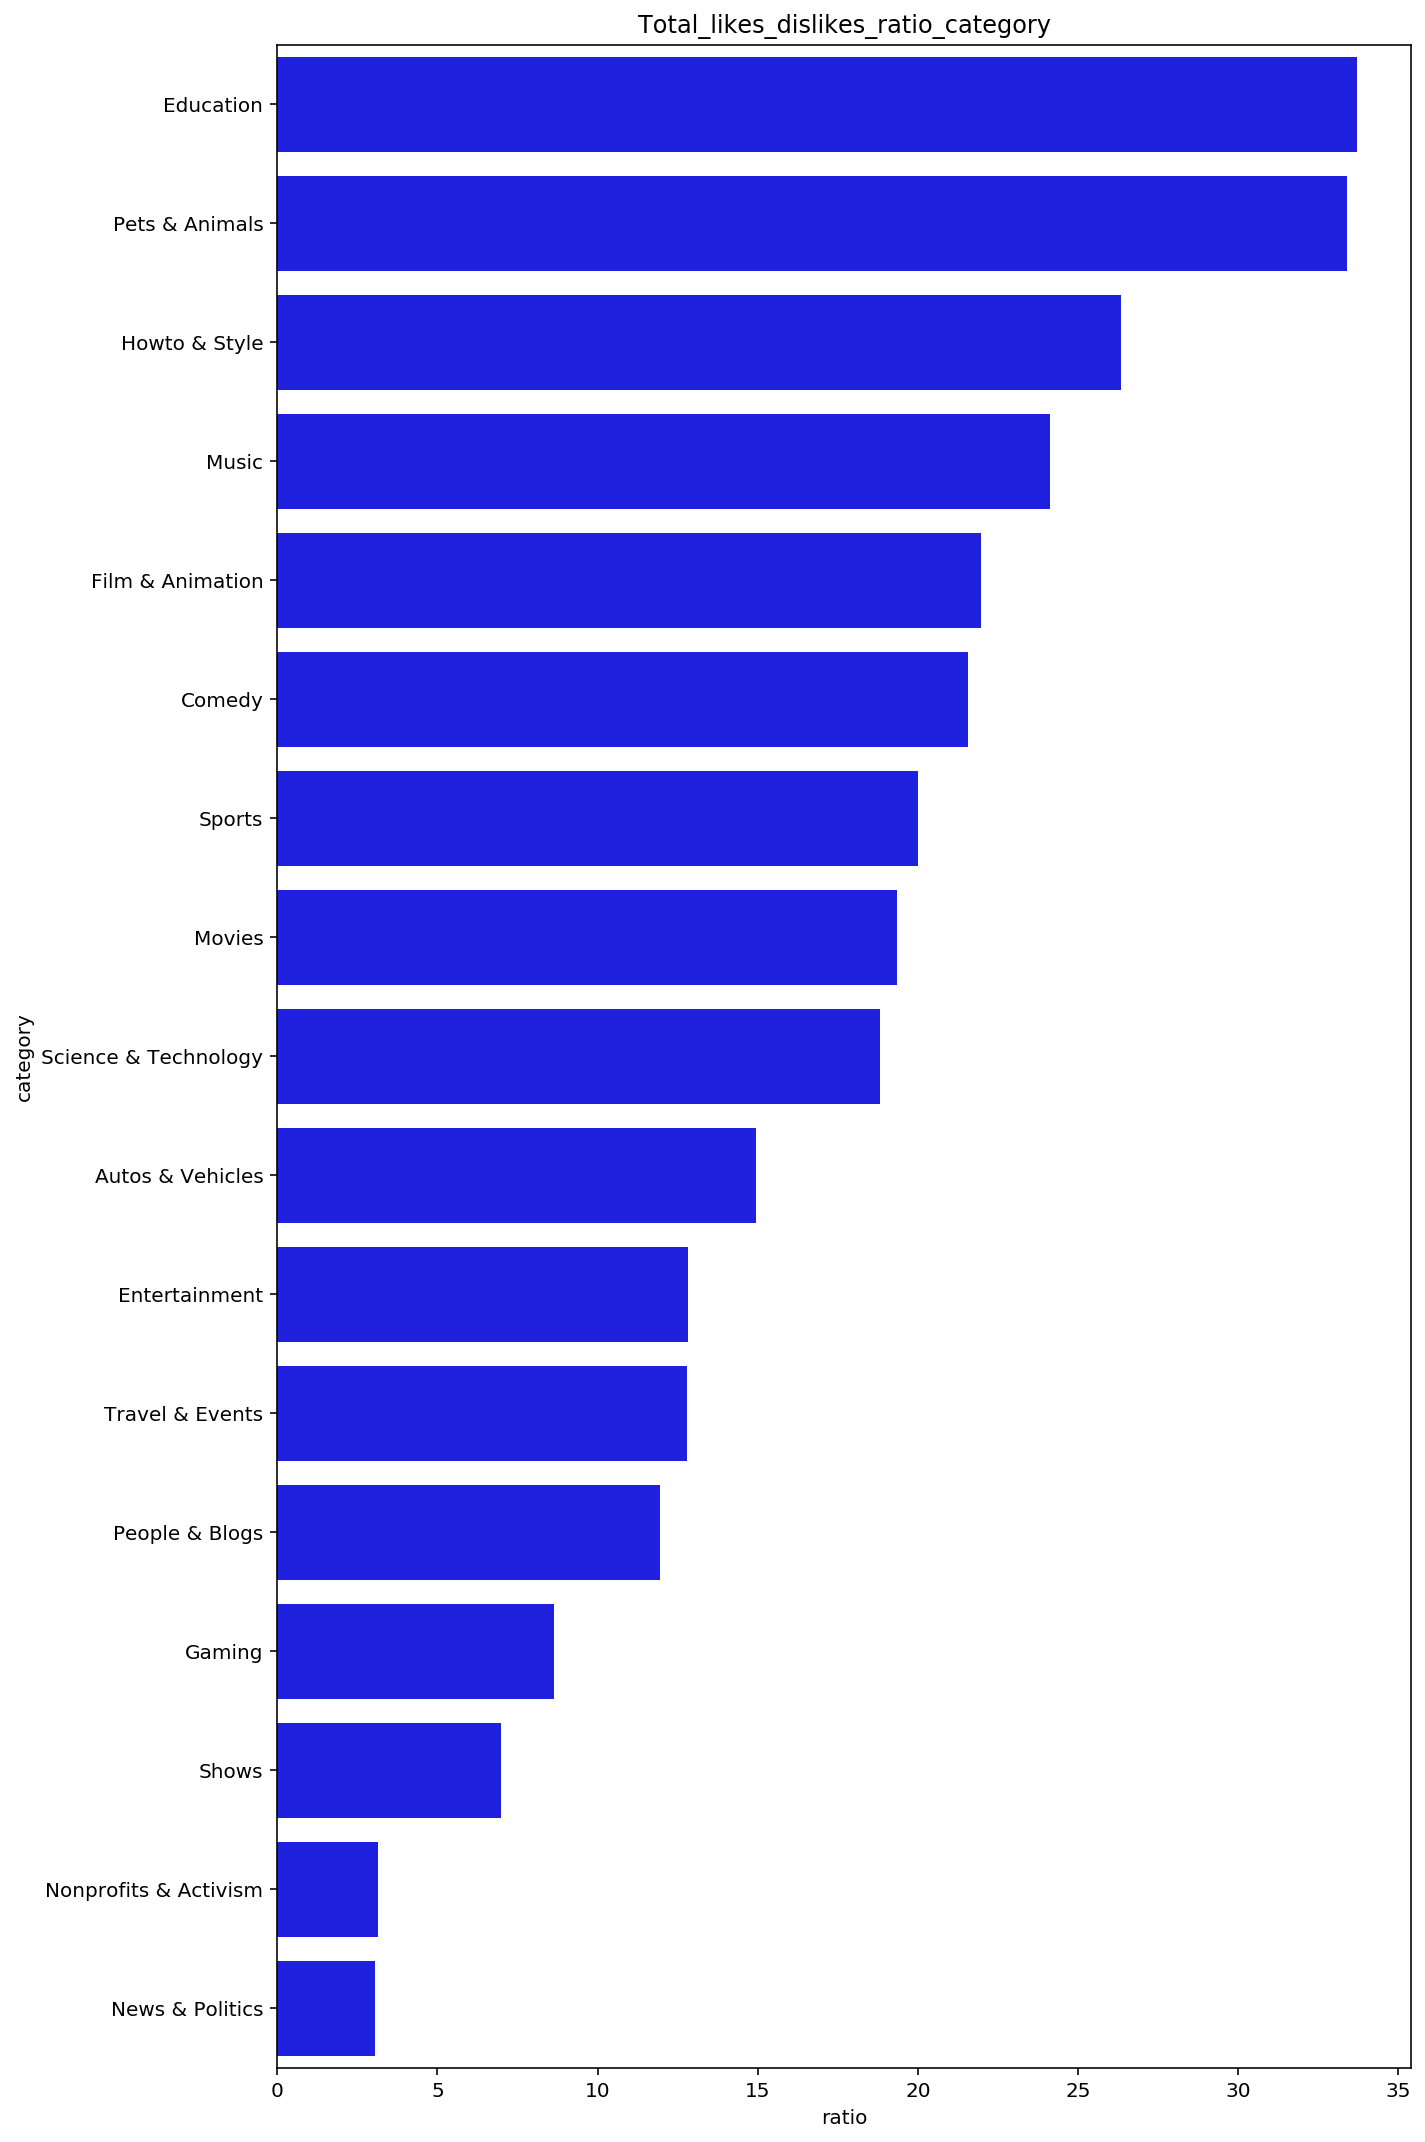

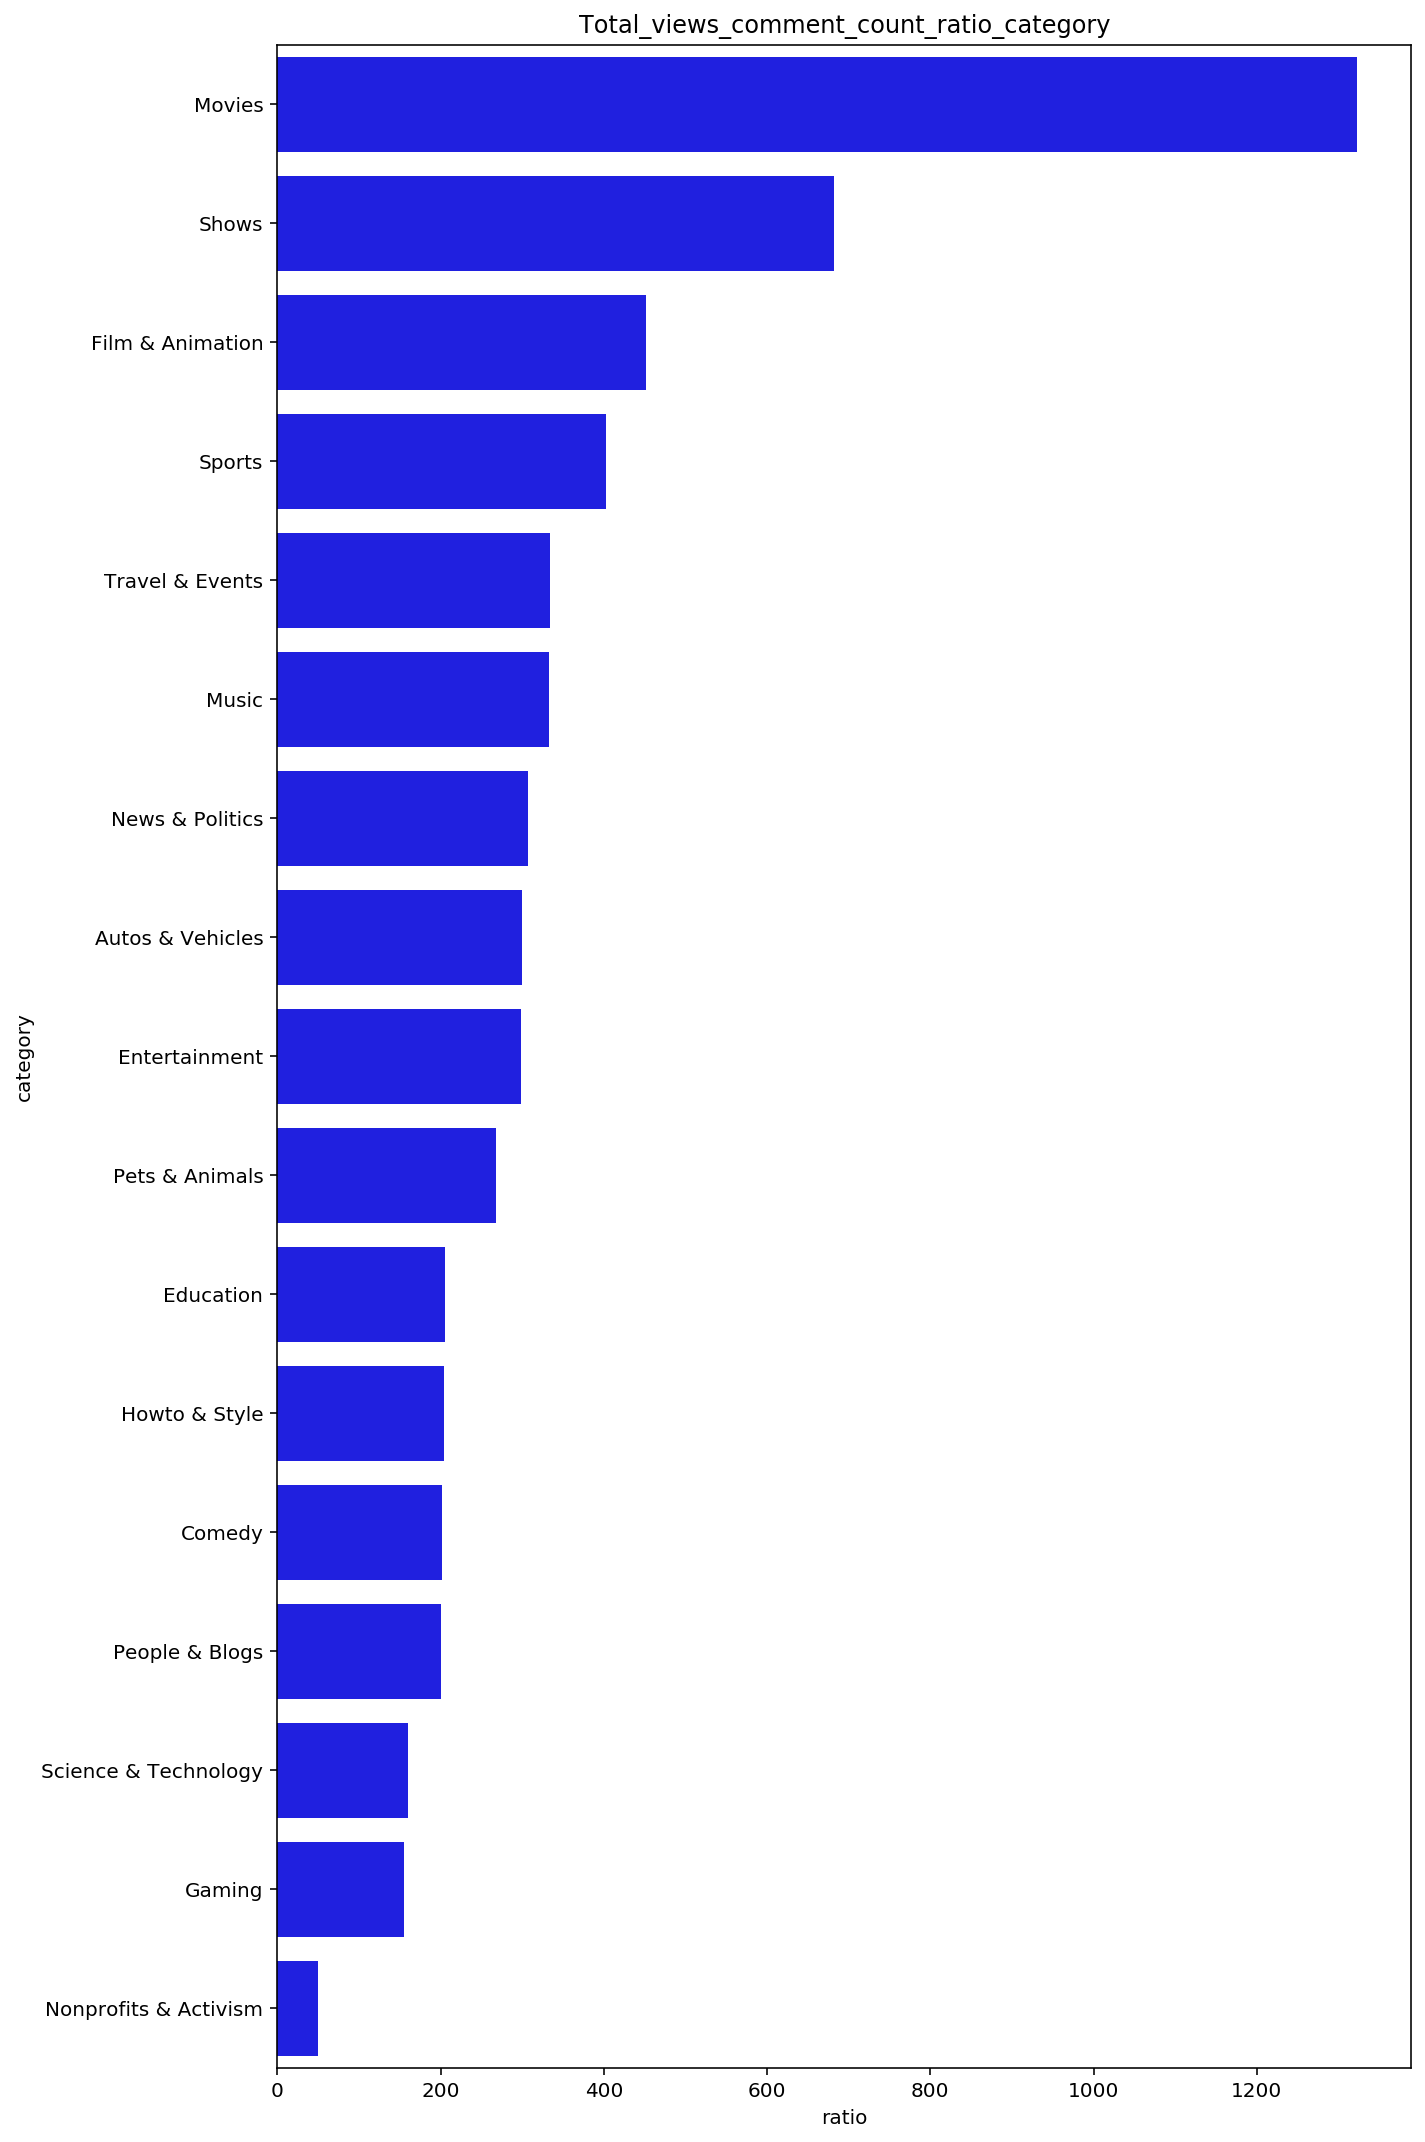

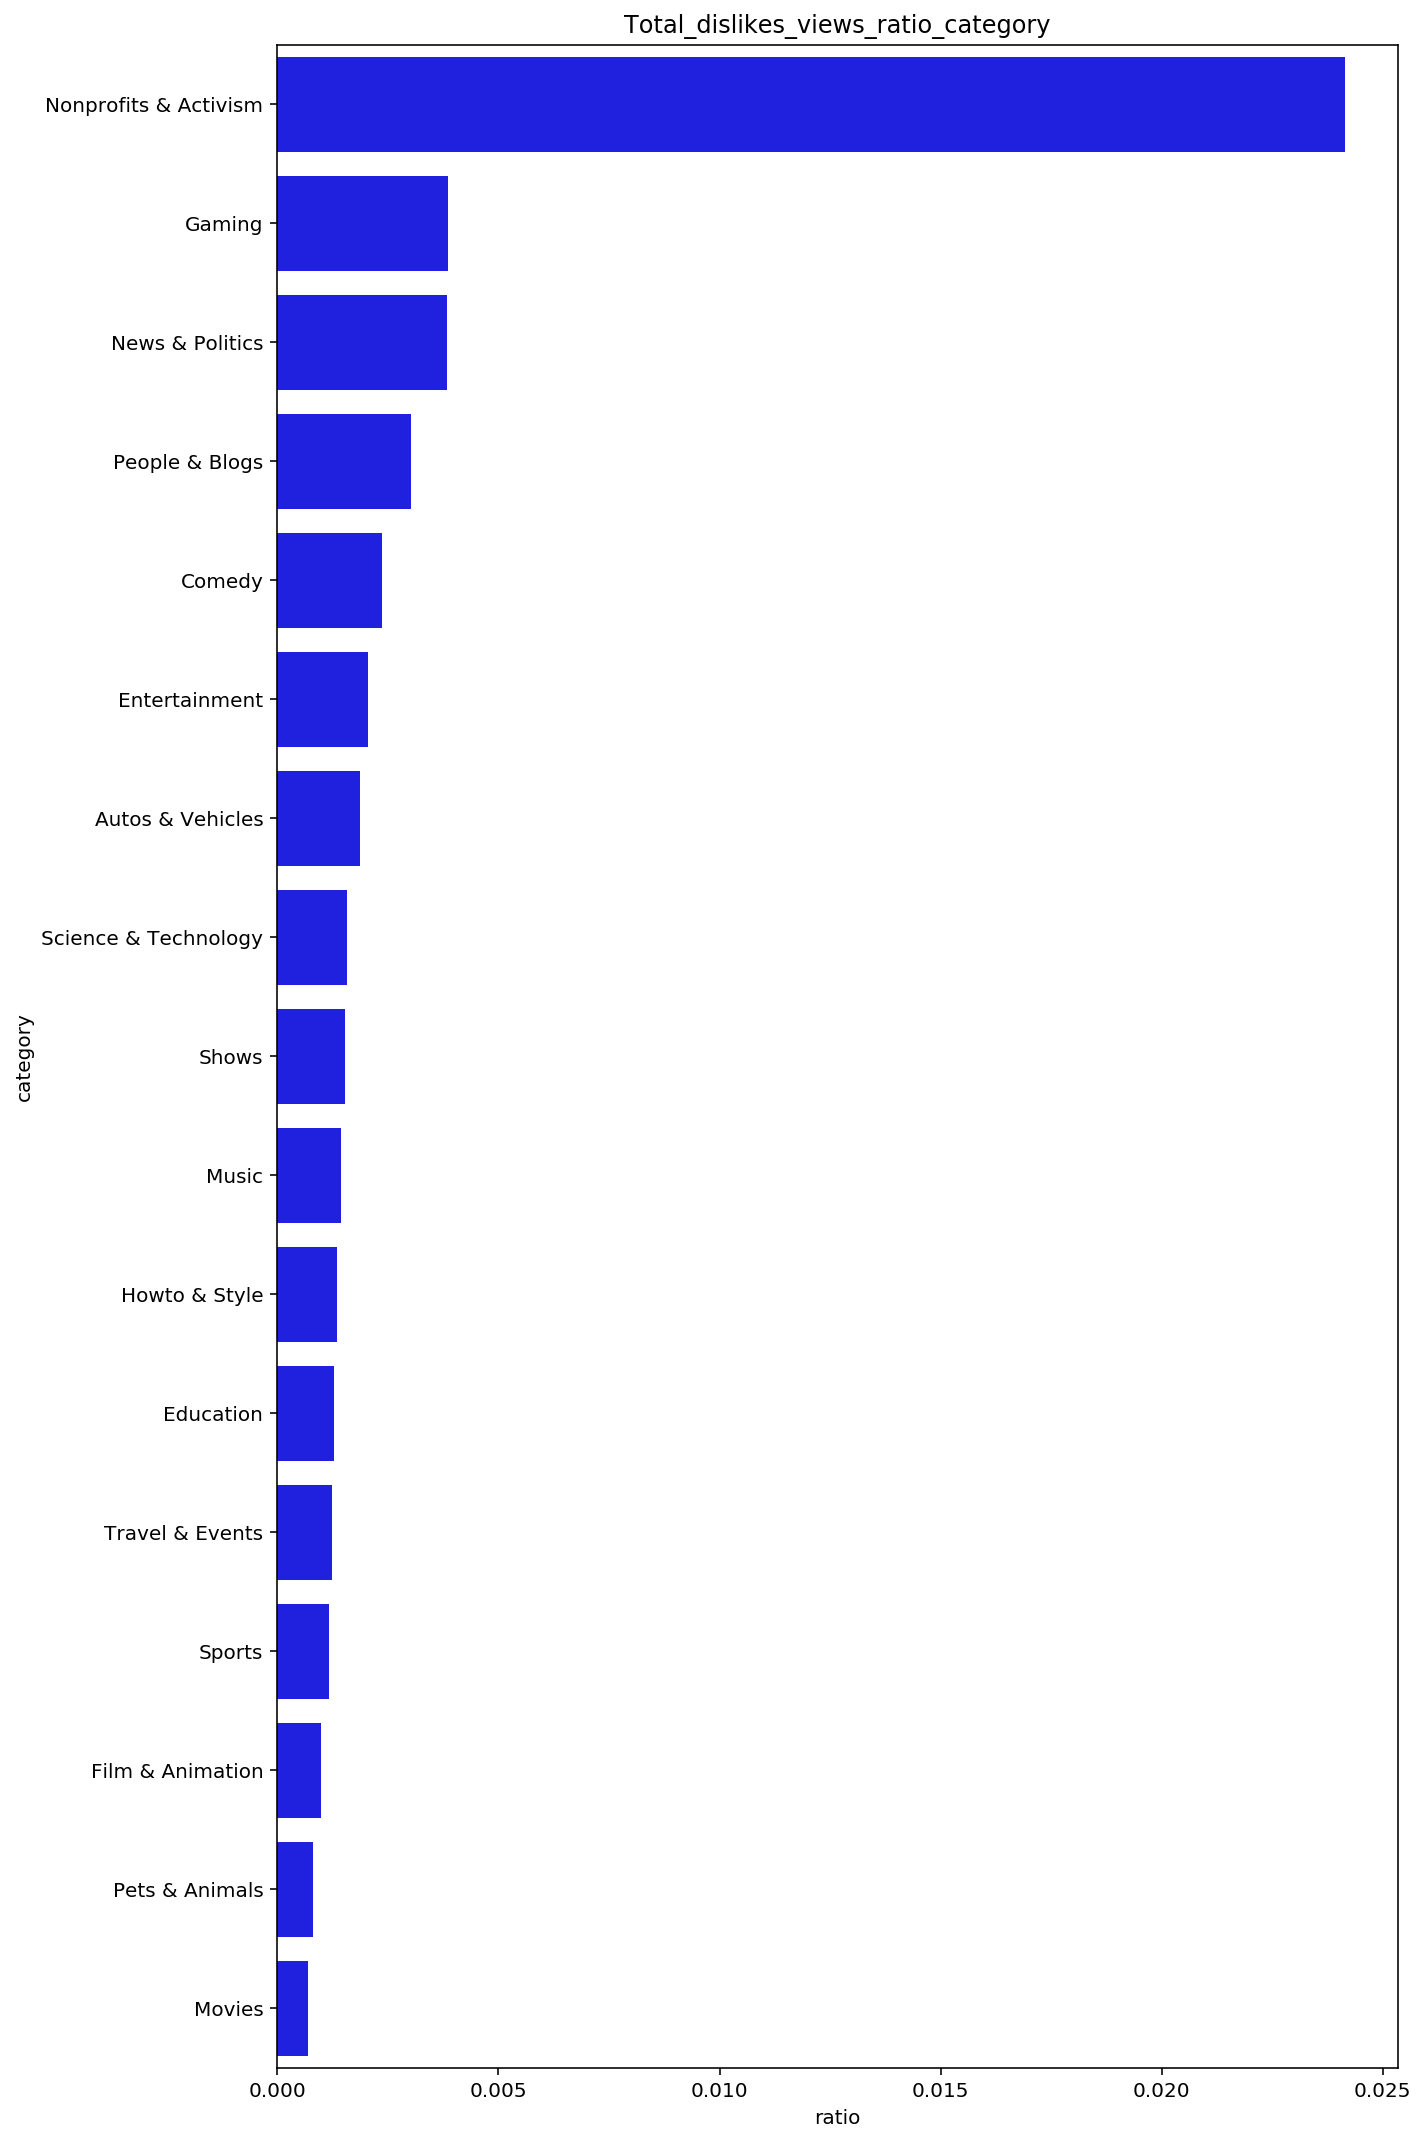

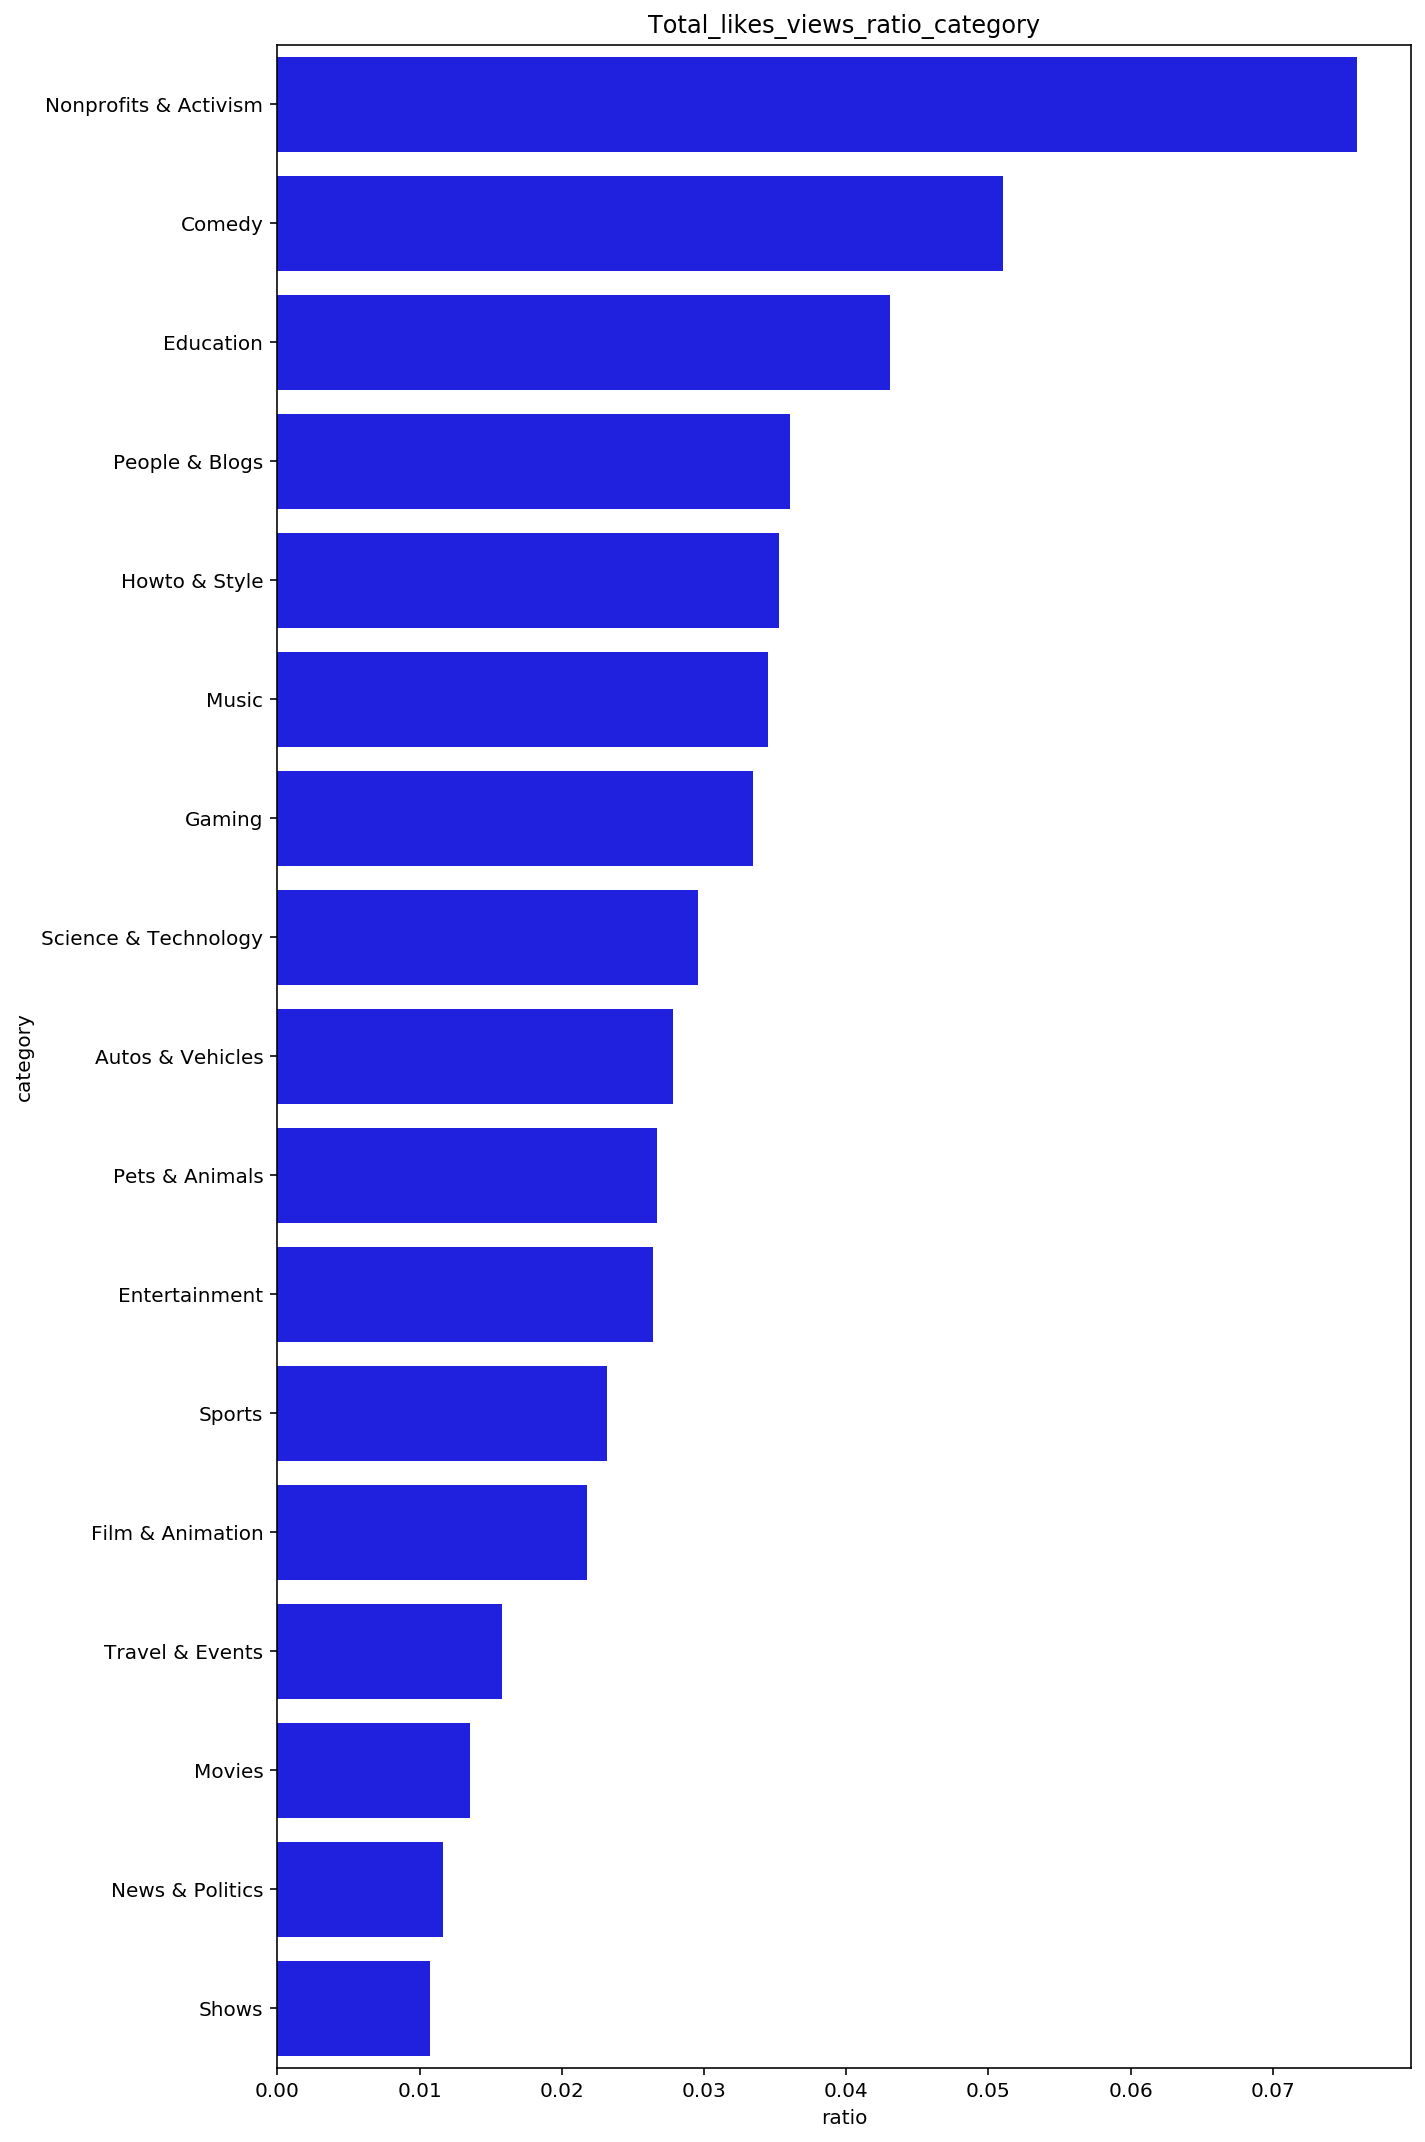

In [9]:
for a, b in combinations:
    visualize.plot_ratio(past_df, a, b, country="Total")

In [54]:
import pandas as pd

for file in ['./Current/input/INvideos.csv', './Current/input/RUvideos.csv', './Current/input/USvideos.csv']:
    df = pd.read_csv(file)
    print(df.columns)
    # df.rename(columns = {'view_count': 'views'}, inplace=True)
    # df.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1.1'], inplace=True, axis=1)
    df = df["category_id"].astype(int)
    df.to_csv(file)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'video_id', 'title', 'publish_time',
       'channelId', 'channelTitle', 'category_id', 'trending_date', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description'],
      dtype='object')


ValueError: Cannot convert non-finite values (NA or inf) to integer